### Chirality Check

In chemistry, a molecule is chiral if it cannot be superimposed onto its mirror image by any combination of translation and rotation. These non-superposable mirror images are called enantiomers which share identical chemical and physical properties, but have distinct chemical reactivity and optical rotation properties. Checking whether two structures are enantiomers can be formulated as a Procrustes problem.

>**Rotational Procrustes**
>
> Given matrix $\mathbf{A}_{m \times n}$ and a reference $\mathbf{B}_{m \times n}$, find the rotational transformation matrix $\mathbf{R}_{n \times n}$ that makes $\mathbf{A}$ as close as possible to $\mathbf{B}$, i.e.,
>
\begin{equation}
       \underbrace{\min}_{\left\{\mathbf{R} \left| {\mathbf{R}^{-1} = {\mathbf{R}}^\dagger
                                \atop \left| \mathbf{R} \right| = 1} \right. \right\}}
          \|\mathbf{A}\mathbf{R} - \mathbf{B}\|_{F}^2
\end{equation}

>**Orthogonal Procrustes**
>
> Given matrix $\mathbf{A}_{m \times n}$ and a reference $\mathbf{B}_{m \times n}$, find the find the orthogonal transformation matrix $\mathbf{Q}_{n \times n}$ that makes $\mathbf{A}$ as close as possible to $\mathbf{B}$, i.e.,
>
\begin{equation}
       \underbrace{\min}_{\left\{\mathbf{Q} | \mathbf{Q}^{-1} = {\mathbf{Q}}^\dagger \right\}}
                          \|\mathbf{A}\mathbf{Q} - \mathbf{B}\|_{F}^2
\end{equation}


In the code block below, we use the `procrustes` library to check whether two geometries of the CHFClBr molecule are enantiomers; see **Fig. (i)**. The 3D-Cartesian coordinates of molecules are loaded from their XYZ files using [IOData library](https://github.com/theochem/iodata). Testing whether the coordinates can be matched through translation and rotation (i.e., rotational Procrustes) reveals that these two structures are not identical; see **Fig (ii)**. However, the two coordinates are enantiomers because they can be matched through translation, rotation, and reflection (i.e., orthogonal Procrustes) as shown in **Fig (iii)**.

![Fig. 1 Enantiomers prediction of CHFClBr with rotational-orthogonal Procrustes by comparing the atoms coordinates.](notebook_data/chirality_checking/chirality_checking.png "Fig. 1 Enantiomers prediction of CHFClBr with rotational-orthogonal Procrustes by comparing the atoms coordinates.")

In [1]:
# chirality check with rotational and orthogonal Procrustes

import numpy as np

from iodata import load_one
from procrustes import orthogonal, rotational

# load CHClFBr enantiomers' coordinates from XYZ files
a = load_one("notebook_data/chirality_checking/enantiomer1.xyz").atcoords
b = load_one("notebook_data/chirality_checking/enantiomer2.xyz").atcoords

# rotational Procrustes on a & b coordinates
result_rot = rotational(a, b, translate=True, scale=False)
print("Rotational Procrustes Error = ", result_rot.error)     # output: 26.085545

# orthogonal Procrustes on a & b coordinates
result_ortho = orthogonal(a, b, translate=True, scale=False)
print("Orthogonal Procrustes Error = ", result_ortho.error)   # output: 4.432878e-08

Rotational Procrustes Error =  26.08554575402178
Orthogonal Procrustes Error =  4.432878638510348e-08


#### Plot Procrustes Results

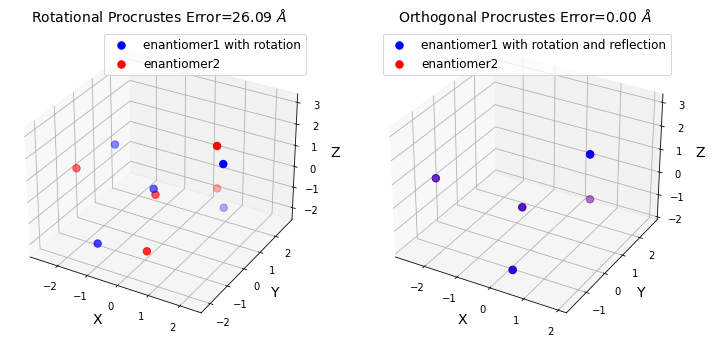

In [2]:
# Plot outputs of Procrustes

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# coordinates of rotated molecule A and molecule B
a_rot = np.dot(result_rot.new_a, result_rot.t)
coords1, coords2 = a_rot, result_rot.new_b
title = "Rotational Procrustes Error={:0.2f} $\AA$".format(result_rot.error)

ax.scatter(xs=coords1[:, 0], ys=coords1[:, 1], zs=coords1[:, 2],
           marker="o", color="blue", s=55, label="enantiomer1 with rotation")
ax.scatter(xs=coords2[:, 0], ys=coords2[:, 1], zs=coords2[:, 2],
           marker="o", color="red", s=55, label="enantiomer2")

ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.set_zlabel("Z", fontsize=14)
ax.legend(fontsize=12, loc="best")
plt.title(title, fontsize=14)


# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# coordinates of rotated-and-refelcted molecule A and molecule B
a_rot = np.dot(result_ortho.new_a, result_ortho.t)
coords1, coords2 = a_rot, result_rot.new_b
title="Orthogonal Procrustes Error={:0.2f} $\AA$".format(result_ortho.error)

ax.scatter(xs=coords1[:, 0], ys=coords1[:, 1], zs=coords1[:, 2],
           marker="o", color="blue", s=55, label="enantiomer1 with rotation and reflection")
ax.scatter(xs=coords2[:, 0], ys=coords2[:, 1], zs=coords2[:, 2],
           marker="o", color="red", s=55, label="enantiomer2")

ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.set_zlabel("Z", fontsize=14)
ax.legend(fontsize=12, loc="best")
plt.title(title, fontsize=14)

plt.show()